In [ ]:
# Imports

import os
import cv2
import torch
import pandas as pd
from ultralytics import YOLO
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Ensure that plots are displayed inline in Jupyter Notebook
%matplotlib inline

In [2]:
model = YOLO("runs/detect/train2/weights/best.pt")

Checking image path: dataset/test/images/7df06d79-021c-47c8-9541-e16dc63f3622_JPG.rf.71c0bb9c97749e464a30c6be78a2c70c.jpg

Processing image for inventory detection: dataset/test/images/7df06d79-021c-47c8-9541-e16dc63f3622_JPG.rf.71c0bb9c97749e464a30c6be78a2c70c.jpg
Detected Inventory:
        Item  Count  Confidence
0    brinjal      1    0.920974
1   capsicum      1    0.902856
2  coriander      1    0.922263
3     garlic      1    0.964039
4      onion      1    0.950051
5     potato      1    0.899501
6     tomato      1    0.922647

Displaying results for image: dataset/test/images/7df06d79-021c-47c8-9541-e16dc63f3622_JPG.rf.71c0bb9c97749e464a30c6be78a2c70c.jpg


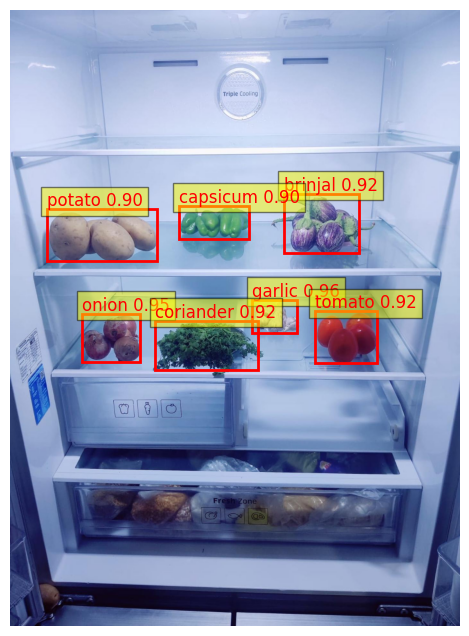

In [3]:
from helper import *

# Detect Inventory and Use UI

image_path = 'dataset/test/images/7df06d79-021c-47c8-9541-e16dc63f3622_JPG.rf.71c0bb9c97749e464a30c6be78a2c70c.jpg'  # Update with your image path
print(f"Checking image path: {image_path}")

inventory_df, results = detect_inventory(model, image_path)

# Show the image with detected bounding boxes
if results:
    display_results(model, image_path, results)
else:
    print("No results to display.")

In [4]:
ingredients_list = expand_ingredients(inventory_df['Item'].to_list())
print(ingredients_list)

['brinjal', 'eggplant', 'aubergine', 'capsicum', 'bell pepper', 'green pepper', 'red pepper', 'coriander', 'cilantro', 'garlic', 'onion', 'yellow onion', 'red onion', 'potato', 'potatoes', 'tomato', 'tomatoes']


In [7]:
from query_recipes import suggest_recipes_raw, _print_results

results = suggest_recipes_raw(ingredients=ingredients_list, 
                              max_kcal_per_100g=None,  # e.g. 150 to filter by calories 
                              cuisine=None,            # e.g. "italian" if you add cuisine labels later 
                              n_results=50, 
                              max_return=5, )

_print_results(results)

1. Indian Potatoes, Peas and Cauliflower  (id: a2307a7134)
   ~62.1 kcal per 100g
   URL: http://www.epicurious.com/recipes/food/views/indian-potatoes-peas-and-cauliflower-102405
   Ingredients (normalized):
     - cauliflower, raw
     - oil, olive, salad or cooking
     - peas, green, frozen, unprepared
     - potatoes, raw, skin
     - salt, table
     - spices, chili powder
     - spices, ginger, ground
     - spices, paprika
     - spices, turmeric, ground
     - water, bottled, generic
2. Tomato And Pepper Relish Recipe  (id: 8c32e0f236)
   ~90.0 kcal per 100g
   URL: http://cookeatshare.com/recipes/tomato-and-pepper-relish-35044
   Ingredients (normalized):
     - celery, raw
     - mustard, prepared, yellow
     - oil, olive, salad or cooking
     - onions, raw
     - peppers, sweet, green, raw
     - salt, table
     - tomatoes, red, ripe, raw, year round average
     - vinegar, distilled
3. Red Pepper, Cilantro, Walnut, and Jalapeno Relish  (id: 3ae1eae5e5)
   ~144.2 kcal per